# Projet 9 : La poule qui chante
## Partie 2 : Clusterings, analyse des centroïdes et ACP
-----
## 1 Importation des librairies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, centroid
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from sklearn.neighbors import NearestCentroid

C:\Users\danie\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


On charge Seaborn

In [2]:
sns.set()

-----
## 2 Importation des données

In [3]:
df_merged = pd.read_csv('p9_merged.csv')
df_merged.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population en milliers,PIB/hab en $
0,Afghanistan,5.0,1.53,0.33,0.54,57.0,29.0,55.0,28.0,0.0,36296.113,530.149831
1,Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,514.0,2035.0,1667.0,0.0,57009.756,6723.928582
2,Albanie,85.0,16.36,6.45,6.26,47.0,38.0,47.0,13.0,4.0,2884.169,4521.752219
3,Algérie,22.0,6.38,1.50,1.97,277.0,2.0,264.0,275.0,0.0,41389.189,4134.936054
4,Allemagne,71.0,19.47,4.16,7.96,1739.0,842.0,1609.0,1514.0,-29.0,82658.409,44670.222288


Suite à une 1ère analyse, la Chine et l'Inde ne nous permettent pas de visualiser correctement certaines données, comme par exemple la variance de la population des clusters, leur population étant beaucoup plus importante que la moyenne mondiale.

Afin d'avoir une analyse plus fine et pertinente, nous supprimons ces 2 pays du dataset.

In [4]:
df_merged.drop(df_merged[df_merged['Zone'] == 'Chine, continentale'].index, inplace = True)
df_merged.drop(df_merged[df_merged['Zone'] == 'Inde'].index, inplace = True)

-----
## 3 Clusterings
### 3.1 Classification ascendante hiérarchique
#### 3.1.1 Dendrogramme
On calcule nos distances avec la méthode Ward et la librairie scikit-learn. Cette matrice de distance sera notée Z.

In [5]:
# Mettre la variable 'Zone' en tant qu'index
df_merged = df_merged.set_index('Zone')

# Calcul de la matrice de distance avec la méthode Ward
Z = linkage(df_merged, method = "ward")
pd.DataFrame(Z).head()

,0,1,2,3
0,58.0,122.0,135.878274,2.0
1,83.0,123.0,208.195414,2.0
2,87.0,127.0,234.865094,2.0
3,12.0,74.0,249.234054,2.0
4,26.0,156.0,272.540552,2.0


On affiche notre dendrogramme.

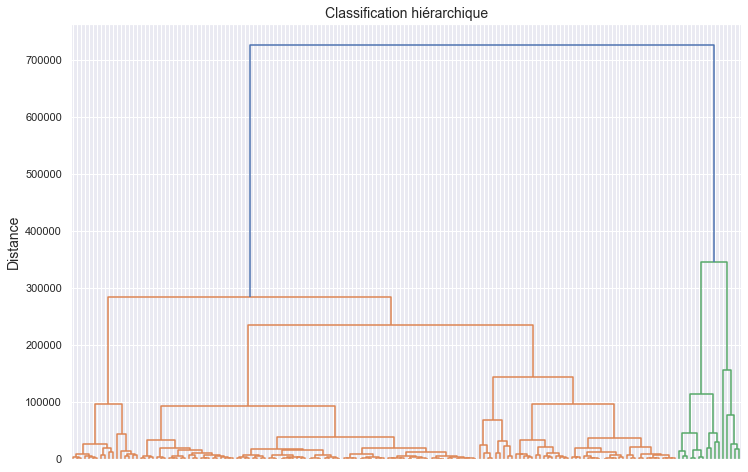

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, ax=ax)

plt.title("Classification hiérarchique", fontsize = 14)
plt.ylabel("Distance", fontsize = 14)
plt.tick_params(axis ='x', labelbottom = False)
plt.show()

Sur l'axe y, la distance entre clusters s'agrandit fortement à partir d'une distance de 20 000. Nous choisissons de grouper nos individus en 5 clusters. 

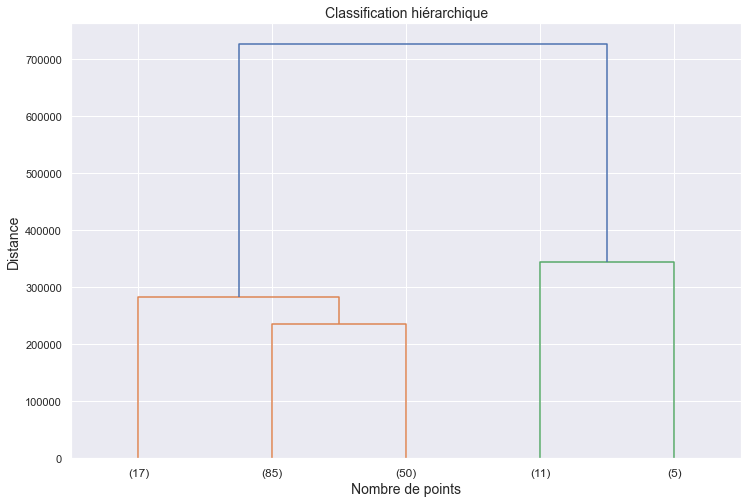

In [7]:
# les arguments p=5, truncate_mode="lastp" vont afficher 5 clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode = "lastp", ax=ax)

plt.title("Classification hiérarchique", fontsize = 14)
plt.xlabel("Nombre de points", fontsize = 14)
plt.ylabel("Distance", fontsize = 14)
plt.show()

#### 3.1.2 Définition des clusters avec scikit-learn

In [8]:
# On instancie un estimateur
cah = AgglomerativeClustering(n_clusters=5, linkage="ward")

# On entraîne l'estimateur
cah.fit(df_merged)

AgglomerativeClustering(n_clusters=5)

In [9]:
# On affiche les clusters
cah.labels_

array([1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 3, 3, 4, 4, 2, 4, 3, 4, 4, 4, 4, 0,
       4, 1, 4, 4, 4, 1, 1, 1, 1, 3, 3, 1, 4, 1, 4, 4, 4, 4, 1, 3, 4, 4,
       4, 1, 4, 4, 4, 3, 1, 2, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 0,
       2, 1, 3, 3, 3, 1, 4, 2, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 1,
       1, 1, 4, 1, 4, 1, 4, 4, 2, 4, 4, 1, 1, 4, 4, 1, 0, 3, 4, 3, 1, 4,
       1, 0, 4, 4, 3, 2, 1, 4, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 3, 4, 3, 1, 4, 1, 4, 2, 4, 4, 4, 4, 4, 2,
       1, 4, 4, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 4], dtype=int64)

In [10]:
# On remplace les nombres par des lettres pour nommer les clusters
dd = {i:j for i,j in enumerate(list("abcde"))}
labels = [dd[i] for i in cah.labels_]
labels[:10]

['b', 'b', 'e', 'b', 'b', 'b', 'e', 'b', 'b', 'e']

In [11]:
# On ajoute les labels au dataframe
df_hierarchical = df_merged.copy()
df_hierarchical["cah_cluster"] = labels
df_hierarchical.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population en milliers,PIB/hab en $,cah_cluster
Zone,,,,,,,,,,,,
Afghanistan,5.0,1.53,0.33,0.54,57.0,29.0,55.0,28.0,0.0,36296.113,530.149831,b
Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,514.0,2035.0,1667.0,0.0,57009.756,6723.928582,b
Albanie,85.0,16.36,6.45,6.26,47.0,38.0,47.0,13.0,4.0,2884.169,4521.752219,e
Algérie,22.0,6.38,1.50,1.97,277.0,2.0,264.0,275.0,0.0,41389.189,4134.936054,b
Allemagne,71.0,19.47,4.16,7.96,1739.0,842.0,1609.0,1514.0,-29.0,82658.409,44670.222288,b


#### 3.1.3 Calcul des centroïdes

In [12]:
# On stocke les centroïdes dans une variable
z_predict = cah.fit_predict(Z)
clf = NearestCentroid()
clf.fit(Z, z_predict)
clf.centroids_

array([[2.66375000e+02, 3.19625000e+02, 1.05049787e+05, 2.77500000e+01],
       [3.26333333e+02, 3.30000000e+02, 2.87708757e+05, 1.01000000e+02],
       [2.07454545e+02, 2.69409091e+02, 2.74977519e+04, 1.34545455e+01],
       [3.32000000e+02, 3.33000000e+02, 7.26558530e+05, 1.68000000e+02],
       [1.09406015e+02, 1.74789474e+02, 3.51397931e+03, 3.97744361e+00]])

### 3.2 K-means

#### 3.2.1 Définition du nombre de clusters : méthode du coude

In [13]:
# On stocke nos inerties
intertia = []

# On définit la liste du nombre de clusters que l'on veut tester
k_list = range(2, 10)
list(k_list)

[2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
# Ensuite, pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_merged) 
  intertia.append(kmeans.inertia_)

# La liste d'inerties
intertia

[178054514059.04254,
 117724288824.93619,
 75362427045.22116,
 52870047985.11389,
 40522798067.068985,
 32497061747.244663,
 27535752879.118847,
 22050905222.10882]

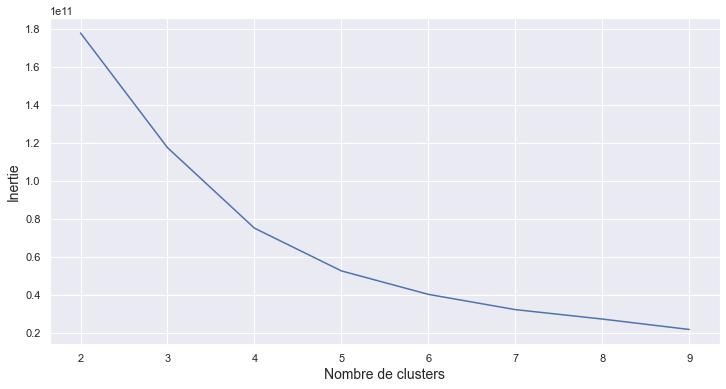

In [15]:
# Graphique inertie intraclasse

fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("Inertie", fontsize = 14)
ax.set_xlabel("Nombre de clusters", fontsize = 14)
ax = plt.plot(k_list, intertia)

L'inertie intraclasse diminue fortement à partir de 5 et 6 clusters. Nous choisissons un nombre de 5 clusters pour faciliter la comparaison des 2 méthodes de clustering.
#### 3.2.2 Clusters

In [16]:
# On entraîne l'estimateur
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_merged)

KMeans(n_clusters=5)

In [17]:
kmeans.labels_

array([4, 4, 0, 4, 1, 4, 0, 4, 4, 0, 3, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 4, 3, 0, 3, 3, 4, 0, 4, 0, 0, 0, 0, 4, 3, 0, 0,
       0, 4, 0, 0, 0, 3, 4, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 4, 3, 3, 3, 4, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4,
       4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 4, 4, 0, 0, 0, 2, 3, 0, 3, 4, 0,
       4, 2, 0, 0, 3, 1, 4, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1,
       4, 0, 0, 4, 1, 4, 0, 0, 1, 3, 0, 2, 1, 0])

In [18]:
# On remplace les chiffres par des lettres
dd = {i:j for i,j in enumerate(list("abcde"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

In [19]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['e', 'e', 'a', 'e', 'b', 'e', 'a', 'e', 'e', 'a']

In [20]:
# On ajoute nos labels à df_kmeans
df_kmeans = df_merged.copy()
df_kmeans["kmeans_cluster"] = labels
df_kmeans.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population en milliers,PIB/hab en $,kmeans_cluster
Zone,,,,,,,,,,,,
Afghanistan,5.0,1.53,0.33,0.54,57.0,29.0,55.0,28.0,0.0,36296.113,530.149831,e
Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,514.0,2035.0,1667.0,0.0,57009.756,6723.928582,e
Albanie,85.0,16.36,6.45,6.26,47.0,38.0,47.0,13.0,4.0,2884.169,4521.752219,a
Algérie,22.0,6.38,1.50,1.97,277.0,2.0,264.0,275.0,0.0,41389.189,4134.936054,e
Allemagne,71.0,19.47,4.16,7.96,1739.0,842.0,1609.0,1514.0,-29.0,82658.409,44670.222288,b


#### 3.2.3 Calcul des centroïdes

In [21]:
# On stocke les centroïdes dans une variable
centroids = kmeans.cluster_centers_
centroids

array([[7.43400000e+01, 2.02836000e+01, 4.96610000e+00, 6.92430000e+00,
        9.38300000e+01, 3.26800000e+01, 8.96400000e+01, 8.00200000e+01,
        8.94000000e+00, 6.25397014e+03, 7.98566458e+03],
       [6.22727273e+01, 1.73109091e+01, 4.08090909e+00, 5.94272727e+00,
        1.91490909e+03, 3.42636364e+02, 1.86890909e+03, 1.75990909e+03,
        7.31818182e+01, 1.09505490e+05, 1.18319133e+04],
       [9.40000000e+01, 2.35540000e+01, 6.62600000e+00, 8.06200000e+00,
        6.41100000e+03, 2.58000000e+01, 6.27920000e+03, 7.97960000e+03,
        1.12000000e+01, 2.39269799e+05, 1.52592106e+04],
       [1.12944444e+02, 3.02605556e+01, 6.91888889e+00, 1.18444444e+01,
        3.14722222e+02, 1.67555556e+02, 3.11611111e+02, 3.38611111e+02,
        1.88888889e+00, 9.41777533e+03, 5.92075158e+04],
       [6.14411765e+01, 1.67070588e+01, 3.97088235e+00, 6.01823529e+00,
        7.91235294e+02, 1.34882353e+02, 7.26117647e+02, 7.85205882e+02,
        2.02352941e+01, 4.04218840e+04, 9.62121575e+

-----
## 3 Comparaison classification hiérarchique VS K-means
### 3.1 Liste des pays des clusters
On compare la correspondance des clusters de chaque méthode.

In [22]:
# On réindexe les 3 dataframes
df_merged = df_merged.reset_index()
df_hierarchical = df_hierarchical.reset_index()
df_kmeans = df_kmeans.reset_index()

# On ajoute les colonnes 'cah_cluster' et 'kmeans_cluster' au dataframe 'df_merged'
df_merged = df_merged.merge(df_hierarchical[['Zone', 'cah_cluster']])
df_merged = df_merged.merge(df_kmeans[['Zone', 'kmeans_cluster']])

On modifie les labels de 'kmeans_cluster' afin qu'ils correspondent à ceux de 'cah_cluster'.

In [23]:
# On vérifie les correspondances du cluster classification 'a'

df_merged.loc[df_merged['kmeans_cluster'] == 'a', ('Zone', 'cah_cluster', 'kmeans_cluster')].head()

,Zone,cah_cluster,kmeans_cluster
2,Albanie,e,a
6,Antigua-et-Barbuda,e,a
9,Arménie,e,a
12,Azerbaïdjan,e,a
13,Bahamas,e,a


In [24]:
# On vérifie les correspondances du cluster classification 'b'

df_merged.loc[df_merged['kmeans_cluster'] == 'b', ('Zone', 'cah_cluster', 'kmeans_cluster')].head()

,Zone,cah_cluster,kmeans_cluster
4,Allemagne,b,b
14,Bangladesh,c,b
51,Fédération de Russie,c,b
66,Iran (République islamique d'),c,b
73,Japon,c,b


In [25]:
# On vérifie les correspondances du cluster classification 'c'

df_merged.loc[df_merged['kmeans_cluster'] == 'c', ('Zone', 'cah_cluster', 'kmeans_cluster')].head()

,Zone,cah_cluster,kmeans_cluster
21,Brésil,a,c
65,Indonésie,a,c
104,Nigéria,a,c
111,Pakistan,a,c
165,États-Unis d'Amérique,a,c


In [26]:
# On vérifie les correspondances du cluster classification 'd'

df_merged.loc[df_merged['kmeans_cluster'] == 'd', ('Zone', 'cah_cluster', 'kmeans_cluster')].head()

,Zone,cah_cluster,kmeans_cluster
10,Australie,d,d
11,Autriche,d,d
16,Belgique,d,d
29,Canada,b,d
31,Chine - RAS de Hong-Kong,d,d


In [27]:
# On vérifie les correspondances du cluster classification 'e'

df_merged.loc[df_merged['kmeans_cluster'] == 'e', ('Zone', 'cah_cluster', 'kmeans_cluster')].head()

,Zone,cah_cluster,kmeans_cluster
0,Afghanistan,b,e
1,Afrique du Sud,b,e
3,Algérie,b,e
5,Angola,b,e
7,Arabie saoudite,b,e


In [28]:
# On remplace les labels des kmeans_clusters

df_merged['kmeans_cluster'].replace((['a', 'b', 'c', 'e']), ['e', 'c', 'a', 'b'], inplace = True)

df_merged[['Zone', 'cah_cluster', 'kmeans_cluster']].head(10)

,Zone,cah_cluster,kmeans_cluster
0,Afghanistan,b,b
1,Afrique du Sud,b,b
2,Albanie,e,e
3,Algérie,b,b
4,Allemagne,b,c
5,Angola,b,b
6,Antigua-et-Barbuda,e,e
7,Arabie saoudite,b,b
8,Argentine,b,b
9,Arménie,e,e


On calcule le taux de correspondance des 2 méthodes de clustering.

In [29]:
# On affiche le nombre total de pays
print (len(df_merged.index))

# On affiche le nombre de pays qui font partis des mêmes clusters des 2 méthodes de clustering
print (len(df_merged.query('cah_cluster == kmeans_cluster')))

# On affiche le taux de correspondance
print (len(df_merged.query('cah_cluster == kmeans_cluster')) / len(df_merged.index) * 100)

168
150
89.28571428571429


#### 150 pays sur 168 font partis des même clusters sur les 2 méthodes de clustering, soit 90 % des pays.
#### Les clusters des 2 méthodes sont très similaires.

In [30]:
df_merged.loc[df_merged['kmeans_cluster'] == 'a', :]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population en milliers,PIB/hab en $,cah_cluster,kmeans_cluster
21,Brésil,204.0,48.03,15.34,15.68,9982.0,3.0,9982.0,14201.0,0.0,207833.823,9896.717512,a,a
65,Indonésie,25.0,7.19,1.61,2.42,2323.0,1.0,1904.0,2301.0,-21.0,264650.963,3839.785074,a,a
104,Nigéria,2.0,1.01,0.10,0.31,202.0,0.0,192.0,201.0,0.0,190873.244,1941.873933,a,a
111,Pakistan,20.0,5.86,1.25,1.97,1282.0,2.0,1218.0,1281.0,-3.0,207906.209,1558.080077,a,a
165,États-Unis d'Amérique,219.0,55.68,14.83,19.93,18266.0,123.0,18100.0,21914.0,80.0,325084.756,59059.596403,a,a


### 3.2 Variance
#### 3.2.1 Disponibilité volailles classification hiérarchique

Text(0, 0.5, 'cah_cluster')

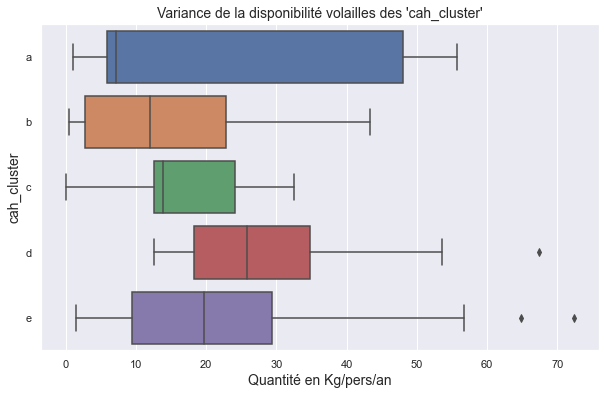

In [31]:
# On trie par ordre alphabétique des clusters
cah_cluster_sorted = sorted(df_merged.cah_cluster.unique())

plt.figure(figsize=(10,6))
sns.boxplot(x="Disponibilité alimentaire en quantité (kg/personne/an)", 
            y="cah_cluster",
            order = cah_cluster_sorted,
            data=df_merged);
plt.title("Variance de la disponibilité volailles des 'cah_cluster'", fontsize = 14)
plt.xlabel('Quantité en Kg/pers/an', fontsize = 14)
plt.ylabel('cah_cluster', fontsize = 14)

#### 3.2.2 Disponibilité volailles K-means

Text(0, 0.5, 'kmeans_cluster')

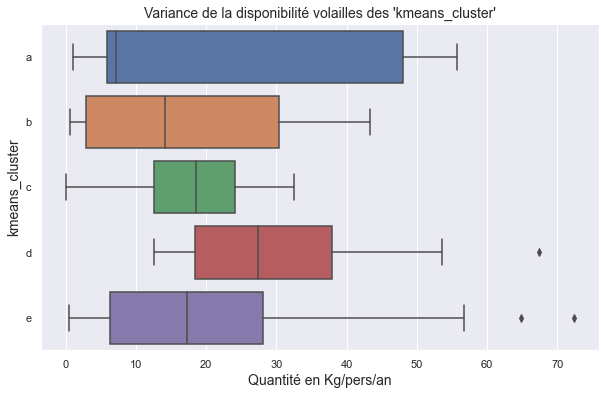

In [32]:
# On trie par ordre alphabétique des clusters
kmeans_cluster_sorted = sorted(df_merged.kmeans_cluster.unique())

plt.figure(figsize=(10,6))
sns.boxplot(x="Disponibilité alimentaire en quantité (kg/personne/an)", 
            y="kmeans_cluster",
            order = kmeans_cluster_sorted,
            data=df_merged);
plt.title("Variance de la disponibilité volailles des 'kmeans_cluster'", fontsize = 14)
plt.xlabel('Quantité en Kg/pers/an', fontsize = 14)
plt.ylabel('kmeans_cluster', fontsize = 14)

#### 3.2.3 Population classification hiérarchique

Text(0, 0.5, 'cah_cluster')

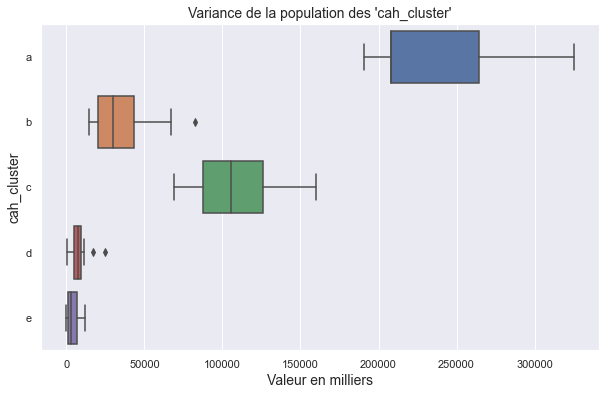

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Population en milliers", 
            y="cah_cluster",
            order = cah_cluster_sorted,
            data=df_merged);
plt.title("Variance de la population des 'cah_cluster'", fontsize = 14)
plt.xlabel('Valeur en milliers', fontsize = 14)
plt.ylabel('cah_cluster', fontsize = 14)

#### 3.2.4 Population K-means

Text(0, 0.5, 'kmeans_cluster')

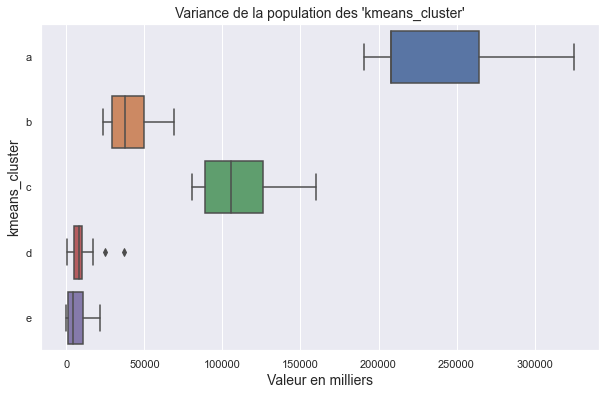

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Population en milliers", 
            y="kmeans_cluster",
            order = kmeans_cluster_sorted,
            data=df_merged);
plt.title("Variance de la population des 'kmeans_cluster'", fontsize = 14)
plt.xlabel('Valeur en milliers', fontsize = 14)
plt.ylabel('kmeans_cluster', fontsize = 14)

#### 3.2.5 PIB par habitant classification hiérarchique

Text(0, 0.5, 'cah_cluster')

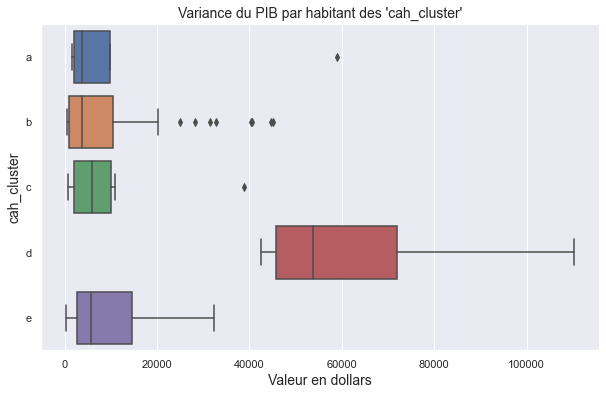

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x="PIB/hab en $", 
            y="cah_cluster",
            order = cah_cluster_sorted,
            data=df_merged);
plt.title("Variance du PIB par habitant des 'cah_cluster'", fontsize = 14)
plt.xlabel('Valeur en dollars', fontsize = 14)
plt.ylabel('cah_cluster', fontsize = 14)

#### 3.2.6 PIB par habitant K-means

Text(0, 0.5, 'kmeans_cluster')

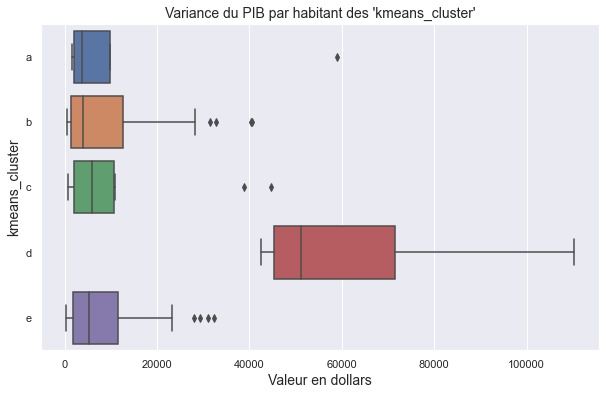

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x="PIB/hab en $", 
            y="kmeans_cluster",
            order = kmeans_cluster_sorted,
            data=df_merged);
plt.title("Variance du PIB par habitant des 'kmeans_cluster'", fontsize = 14)
plt.xlabel('Valeur en dollars', fontsize = 14)
plt.ylabel('kmeans_cluster', fontsize = 14)

-----
## 4 Analyse des centroïdes

In [37]:
# On crée un dataframe
centroids_df = pd.DataFrame(centroids, columns = ['Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Importations - Quantité', 'Nourriture', 'Production', 'Variation de stock', 'Population en milliers', 'PIB/hab en $'])

# On instancie notre scaler
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()

# On l'entraîne
std_scale.fit(centroids_df)

# On transforme nos centroïdes
centroids_scaled = std_scale.transform(centroids_df)

# On vérifie le centrage et la réduction
pd.DataFrame(centroids_scaled).describe().round(2).iloc[1:3:, : ]

,0,1,2,3,4,5,6,7,8,9,10
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.12,1.12,1.12,1.12,1.12,1.12,1.12,1.12,1.12,1.12,1.12


<AxesSubplot:>

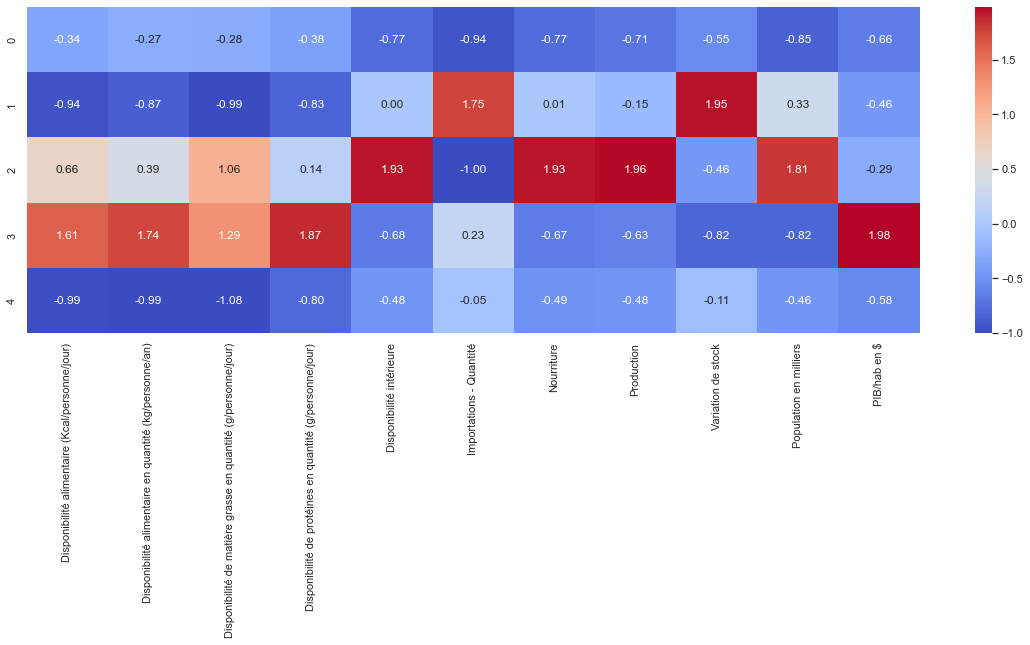

In [38]:
# On convertit 'centroids_scaled' en dataframe
centroids_scaled_df = pd.DataFrame(centroids_scaled, columns = ['Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Importations - Quantité', 'Nourriture', 'Production', 'Variation de stock', 'Population en milliers', 'PIB/hab en $'])

# On affiche la heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(centroids_scaled_df, vmin=-1, annot = True, cmap="coolwarm", fmt = "0.2f")

#### La population contribue majoritairement dans le clustering et le PIB par habitant dans une moindre mesure.
-----
## 5 Analyse des composantes principales
### 5.1 Sélection des variables
On supprime les colonnes inutiles :
- 'cah_cluster' et 'kmeans_cluster'
- Au niveau des disponibilités alimenaires, on ne garde que la disponibilité en quantité (kg/pers/an)
- La disponibilité intérieure, la nourriture et la production sont similaires. On ne garde que la disponibilité intérieure

In [39]:
pca_df = df_merged.copy()
pca_df.drop(['cah_cluster',
             'kmeans_cluster',
             'Disponibilité alimentaire (Kcal/personne/jour)',
             'Disponibilité de matière grasse en quantité (g/personne/jour)', 
             'Disponibilité de protéines en quantité (g/personne/jour)',
             'Nourriture', 
             'Production'], axis = 1, inplace = True)

# On met la variable 'Zone' en tant qu'index
pca_df = pca_df.set_index('Zone')

### 5.2 Préparation des données
On sépare nos données.

In [40]:
X = pca_df.values
X[:2]

array([[1.53000000e+00, 5.70000000e+01, 2.90000000e+01, 0.00000000e+00,
        3.62961130e+04, 5.30149831e+02],
       [3.56900000e+01, 2.11800000e+03, 5.14000000e+02, 0.00000000e+00,
        5.70097560e+04, 6.72392858e+03]])

On vérifie le type de nos données.

In [41]:
type(X)

numpy.ndarray

On vérifie la forme de la matrice.

In [42]:
X.shape

(168, 6)

On enregistre les pays dans une variable 'zones' et nos colonnes dans 'features'.

In [43]:
zones = pca_df.index
features = pca_df.columns

print(zones)
print(features)

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=168)
Index(['Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité intérieure', 'Importations - Quantité',
       'Variation de stock', 'Population en milliers', 'PIB/hab en $'],
      dtype='object')


### 5.3 Scaling

In [44]:
# On instancie
scaler = StandardScaler()

# On fit
scaler.fit(X)

# On transforme
X_scaled = scaler.transform(X) # On peut faire les 2 opérations en une seule : X_scaled = scaler.fit_transform(X)

# On calcule la moyenne (en espérant qu'elle soit = 0) et l'écart-type (en espérant qu'il soit = 1)
idx = ['mean', 'std']

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5
mean,0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


### 5.4 ACP
On travaille sur toutes les composantes.

In [45]:
n_components = 6

# On instancie notre ACP
pca = PCA(n_components=n_components)

# On l'entraîne sur les données scalées
pca.fit(X_scaled)

PCA(n_components=6)

### 5.5 Variance captée et diagramme d'éboulis
On regarde la variance captée (inertie cumulée) pour chaque nouvelle composante.

In [46]:
pca.explained_variance_ratio_

array([0.35672219, 0.22463812, 0.17556246, 0.10965276, 0.10046987,
       0.0329546 ])

La 1ère composante capte 36 % de la variance de nos données initiales, la 2ème 22 % etc.

In [47]:
# On enregistre ces valeurs dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)

# On crée une variable des variances cumulées
scree_cum = scree.cumsum().round()
scree_cum

array([ 36.,  58.,  76.,  87.,  97., 100.])

In [48]:
# On définit une variable avec la liste de nos composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

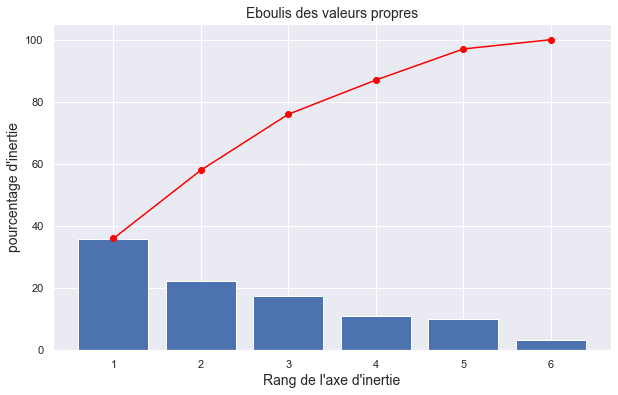

In [49]:
# On affiche le graphique
plt.figure(figsize = (10, 6))
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie", fontsize = 14)
plt.ylabel("pourcentage d'inertie", fontsize = 14)
plt.title("Eboulis des valeurs propres", fontsize = 14)
plt.show(block=False)

Les 2 premières composantes cumulées représentent 58 % de la variance, les 3 premières 76 % et les 4 premières 87 %.
### 5.6 Composantes

In [50]:
# On crée une variable des composantes
pcs = pca.components_

# On la convertit en dataframe
pcs = pd.DataFrame(pcs)

# On renomme les colonnes
pcs.columns = features

# On renomme les indexs
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2).head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Importations - Quantité,Variation de stock,Population en milliers,PIB/hab en $
F1,0.31,0.56,0.42,0.30,0.48,0.31
F2,-0.50,0.31,-0.20,-0.06,0.54,-0.57
F3,-0.43,-0.31,0.42,0.72,-0.10,-0.12
F4,-0.37,-0.11,0.66,-0.62,0.07,0.16
F5,-0.52,0.03,-0.41,0.07,0.12,0.73


In [51]:
# On pivote 'pcs' pour une meilleure lisibilité
pcs.T

,F1,F2,F3,F4,F5,F6
Disponibilité alimentaire en quantité (kg/personne/an),0.306087,-0.502080,-0.427825,-0.368357,-0.524155,0.246510
Disponibilité intérieure,0.555686,0.312669,-0.313309,-0.110196,0.031610,-0.694368
Importations - Quantité,0.415891,-0.199941,0.419239,0.663701,-0.407265,-0.070240
Variation de stock,0.301510,-0.059125,0.720427,-0.617247,0.074194,-0.009065
Population en milliers,0.484262,0.535098,-0.103834,0.068886,0.121649,0.669951
PIB/hab en $,0.314865,-0.565997,-0.115087,0.161033,0.733550,0.056882


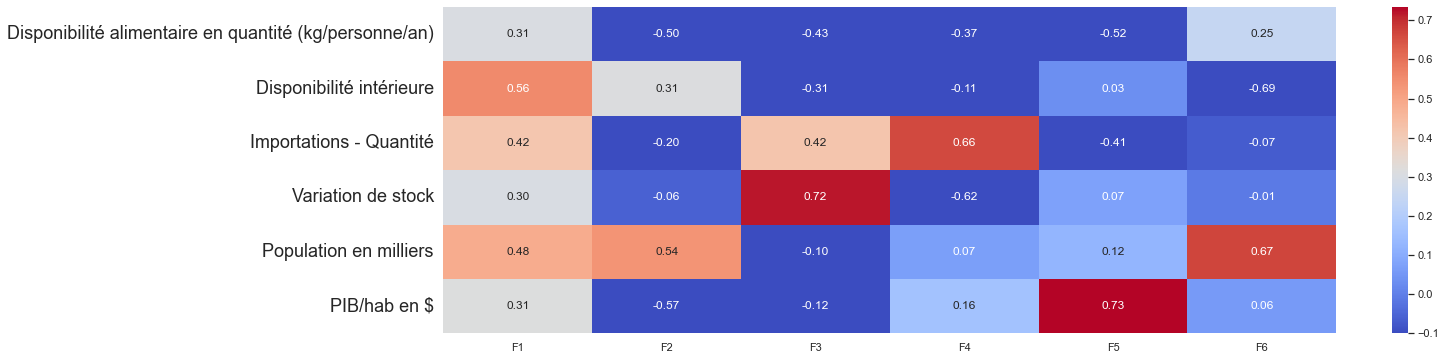

In [52]:
# On affiche une heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-0.1, annot = True, cmap="coolwarm", fmt = "0.2f")
ax.tick_params(axis='y', which='major', labelsize=18)

### 5.7 Cercle des corrélations

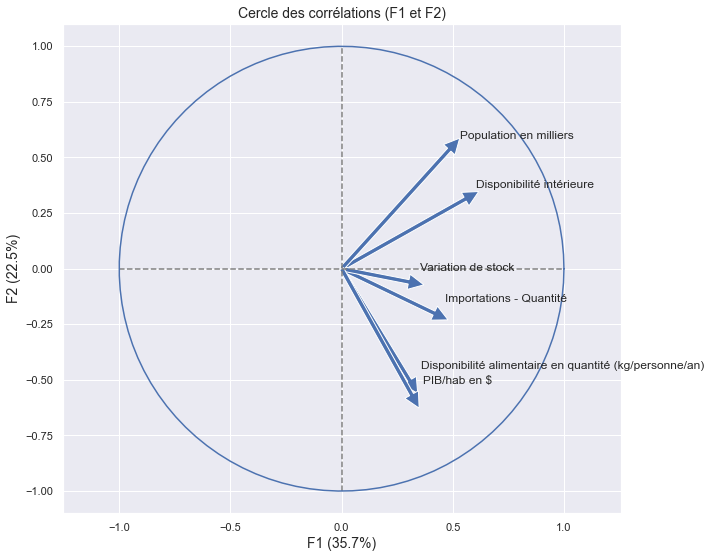

In [53]:
# On définit nos axes x et y et on utilise nos 2 premières composantes
x, y = 0, 1

# On affiche le graphique
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)), fontsize = 14)
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)), fontsize = 14)

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), fontsize = 14)

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [54]:
# On en fait une fonction

def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)), fontsize = 14)
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)), fontsize = 14)

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1), fontsize = 14)

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

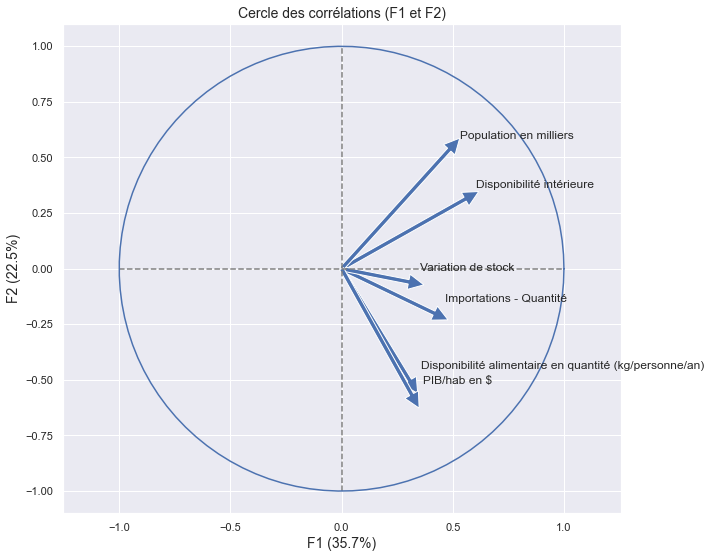

In [55]:
# On vérifie la fonction pour F1 et F2 en reprécisant 0 et 1

x_y = (0,1)
correlation_graph(pca, x_y, features)

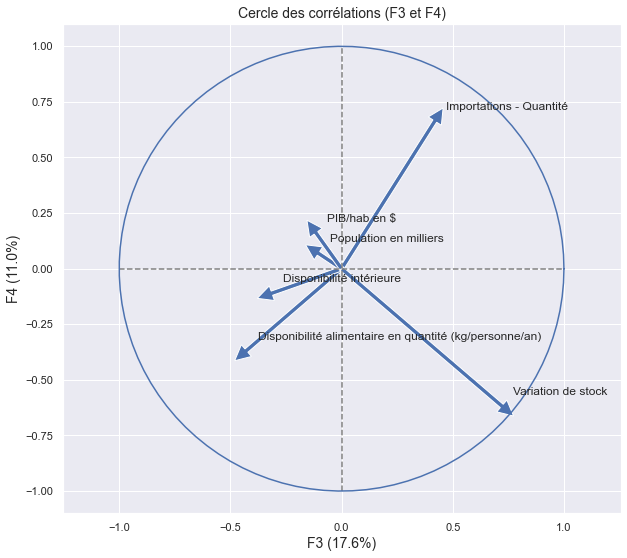

In [56]:
# On applique la fonction pour F3 et F4

correlation_graph(pca, (2,3), features)

### 5.8 Projection des points
On calcule les coordonnées de nos points dans le nouvel espace.

In [57]:
X_proj = pca.transform(X_scaled)
X_proj[:2]

array([[-0.85642823,  1.08865866,  0.39225639,  0.28376177,  0.23528328,
         0.02186134],
       [ 1.87353691, -0.09117678,  0.10999386,  1.17853008, -1.63640675,
        -0.15930866]])

#### On affiche nos points

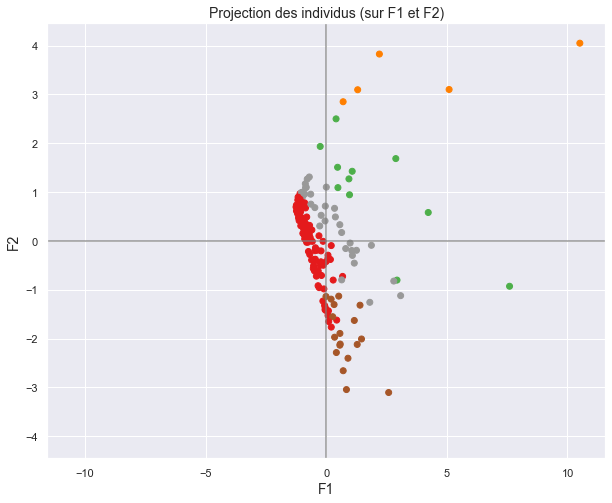

In [58]:
# On remplace les labels par des nombres pour colorier les clusters 
for i in range(len(labels)):
 
    # replace 'a' with 0
    if labels[i] == 'a':
        labels[i] = 0
        
    # replace 'b' with 1
    if labels[i] == 'b':
        labels[i] = 1
        
        # replace 'b' with 2
    if labels[i] == 'c':
        labels[i] = 2
        
        # replace 'b' with 3
    if labels[i] == 'd':
        labels[i] = 3
        
        # replace 'b' with 4
    if labels[i] == 'e':
        labels[i] = 4
        
# On convertit 'X_proj' en dataframe
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2", "F3", "F4", "F5", "F6"])

# On garde une version array de 'X_proj'
X_ = np.array(X_proj)

# On affiche la graphique
fig, ax = plt.subplots(1,1, figsize=(10, 8))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1")

# Valeur x max et y max
x_max = np.abs(X_[:, x]).max() *1.1
y_max = np.abs(X_[:, y]).max() *1.1

# On borne x et y 
ax.set_xlim(left=-x_max, right=x_max)
ax.set_ylim(bottom= -y_max, top=y_max)

# Affichage des lignes horizontales et verticales
plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

# Titre et display
plt.title(f"Projection des individus (sur F{x+1} et F{y+1})", fontsize = 14)
plt.xlabel("F1", fontsize = 14)
plt.ylabel("F2", fontsize = 14)
plt.show()
plt.show()